In [1]:
import numpy as np 
import pandas as pd
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\HP\\Desktop\\FINALYEAR PROJECTS\\dataset2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\HP\Desktop\FINALYEAR PROJECTS\dataset2\full_df.csv
C:\Users\HP\Desktop\FINALYEAR PROJECTS\dataset2\ODIR-5K\ODIR-5K\data.xlsx
C:\Users\HP\Desktop\FINALYEAR PROJECTS\dataset2\ODIR-5K\ODIR-5K\Testing Images\1000_left.jpg
C:\Users\HP\Desktop\FINALYEAR PROJECTS\dataset2\ODIR-5K\ODIR-5K\Testing Images\1000_right.jpg
C:\Users\HP\Desktop\FINALYEAR PROJECTS\dataset2\ODIR-5K\ODIR-5K\Testing Images\1001_left.jpg
C:\Users\HP\Desktop\FINALYEAR PROJECTS\dataset2\ODIR-5K\ODIR-5K\Testing Images\1001_right.jpg
C:\Users\HP\Desktop\FINALYEAR PROJECTS\dataset2\ODIR-5K\ODIR-5K\Testing Images\1002_left.jpg
C:\Users\HP\Desktop\FINALYEAR PROJECTS\dataset2\ODIR-5K\ODIR-5K\Testing Images\1002_right.jpg
C:\Users\HP\Desktop\FINALYEAR PROJECTS\dataset2\ODIR-5K\ODIR-5K\Testing Images\1003_left.jpg
C:\Users\HP\Desktop\FINALYEAR PROJECTS\dataset2\ODIR-5K\ODIR-5K\Testing Images\1003_right.jpg
C:\Users\HP\Desktop\FINALYEAR PROJECTS\dataset2\ODIR-5K\ODIR-5K\Testing Images\1004_left.jpg
C:\Users\HP\Desktop\FINAL

In [3]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\FINALYEAR PROJECTS\\dataset2\\full_df.csv')
print(df.head(3))

def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

   ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
0                           normal fundus  0  0  0  1  0  0  0  0   
1                           normal fundus  1  0  0  0  0  0  0  0   
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1   

                                            filepath labels  \
0  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
1  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   

        

In [4]:

df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
print(left_cataract[:15])

['0_left.jpg' '81_left.jpg' '103_left.jpg' '119_left.jpg' '254_left.jpg'
 '294_left.jpg' '330_left.jpg' '448_left.jpg' '465_left.jpg'
 '477_left.jpg' '553_left.jpg' '560_left.jpg' '594_left.jpg'
 '611_left.jpg' '625_left.jpg']


In [5]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
print(right_cataract[:15])

['24_right.jpg' '81_right.jpg' '112_right.jpg' '188_right.jpg'
 '218_right.jpg' '345_right.jpg' '354_right.jpg' '477_right.jpg'
 '553_right.jpg' '560_right.jpg' '625_right.jpg' '726_right.jpg'
 '769_right.jpg' '949_right.jpg' '955_right.jpg']


In [6]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

print("=========================================")

left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
print(right_normal[:15])

print("=========================================")

cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)
print(len(cataract),len(normal))

Number of images in left cataract: 304
Number of images in right cataract: 290
['2964_right.jpg' '680_right.jpg' '500_right.jpg' '2368_right.jpg'
 '2820_right.jpg' '2769_right.jpg' '2696_right.jpg' '2890_right.jpg'
 '940_right.jpg' '2553_right.jpg' '3371_right.jpg' '3042_right.jpg'
 '919_right.jpg' '3427_right.jpg' '379_right.jpg']
594 500


In [7]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "C:\\Users\\HP\\Desktop\\FINALYEAR PROJECTS\\dataset2\\preprocessed_images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset
dataset = create_dataset(cataract,1)
print(len(dataset))
dataset = create_dataset(normal,0)
print(len(dataset))


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 594/594 [00:04<00:00, 119.36it/s]


588


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:06<00:00, 73.65it/s]

1088


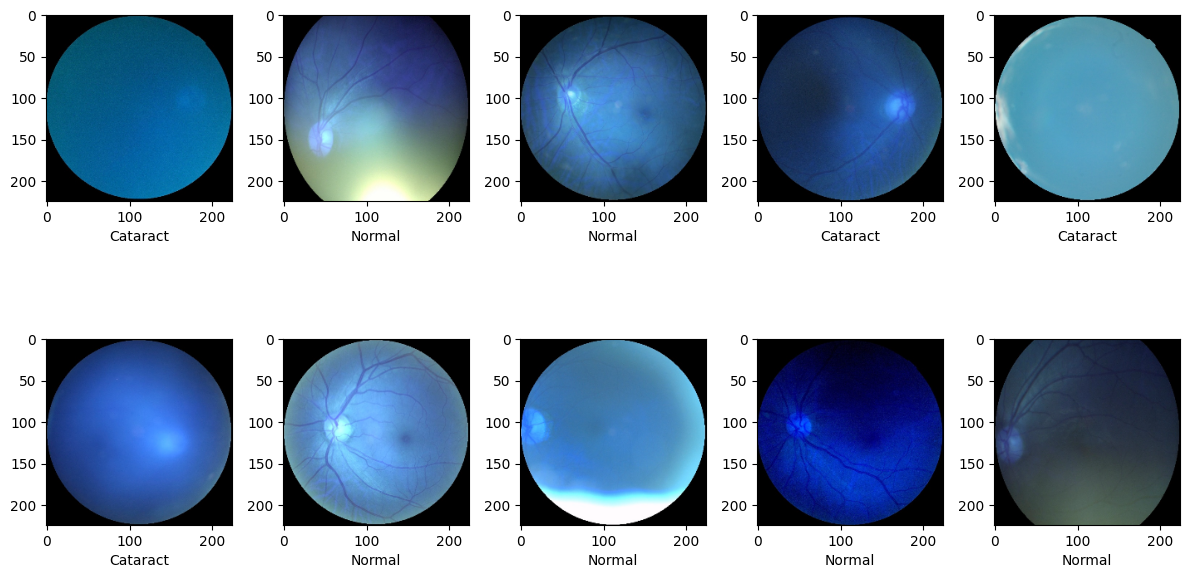

In [8]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout() 
plt.show()

In [9]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

for layer in vgg.layers:
    layer.trainable = False
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20049473 (76.48 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [10]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,save_freq="epoch")
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)
history = model.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
28/28 [==============================] - 228s 8s/step - loss: 2.1614 - accuracy: 0.8598 - val_loss: 0.9714 - val_accuracy: 0.9312
Epoch 2/15
28/28 [==============================] - 221s 8s/step - loss: 0.5956 - accuracy: 0.9563 - val_loss: 0.5734 - val_accuracy: 0.9541
Epoch 3/15
28/28 [==============================] - 229s 8s/step - loss: 0.1368 - accuracy: 0.9793 - val_loss: 0.4894 - val_accuracy: 0.9495
Epoch 4/15
28/28 [==============================] - 243s 9s/step - loss: 0.0481 - accuracy: 0.9897 - val_loss: 0.6191 - val_accuracy: 0.9495
Epoch 5/15
28/28 [==============================] - 230s 8s/step - loss: 0.0233 - accuracy: 0.9908 - val_loss: 0.3835 - val_accuracy: 0.9679
Epoch 6/15
28/28 [==============================] - 217s 8s/step - loss: 2.2826e-04 - accuracy: 1.0000 - val_loss: 0.3188 - val_accuracy: 0.9679
Epoch 7/15
28/28 [==============================] - 235s 8s/step - loss: 1.3918e-04 - accuracy: 1.0000 - val_loss: 0.3181 - val_accuracy: 0.9679
Epoch

In [11]:
model.save('saved_trained_model.h5')

C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
model.save('saved_trained_model.keras')

In [23]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 150s 24s/step - loss: 0.3311 - accuracy: 0.9679
loss: 0.3311086595058441
Accuracy: 0.9678899049758911


In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred= (model.predict(x_test) > 0.5).astype("int32")



7/7 [==============================] - 83s 13s/step


In [32]:
accuracy_score(y_test,y_pred)

0.9678899082568807

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        92
           1       0.95      1.00      0.97       126

    accuracy                           0.97       218
   macro avg       0.97      0.96      0.97       218
weighted avg       0.97      0.97      0.97       218



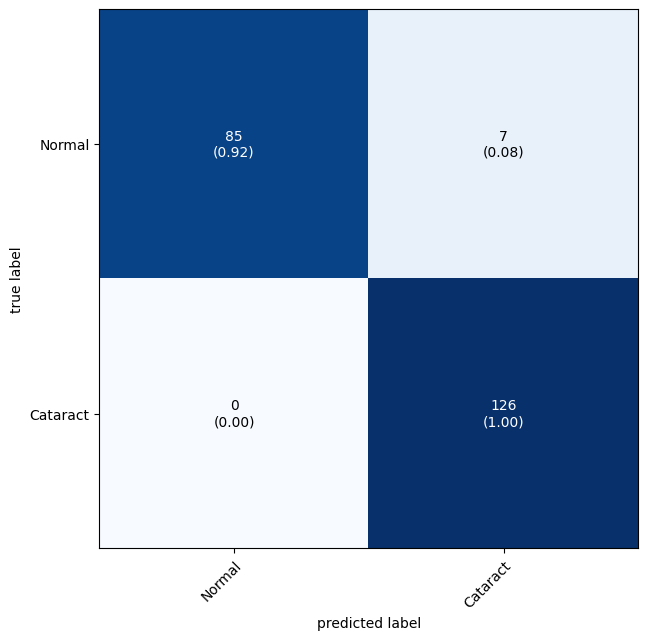

In [34]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

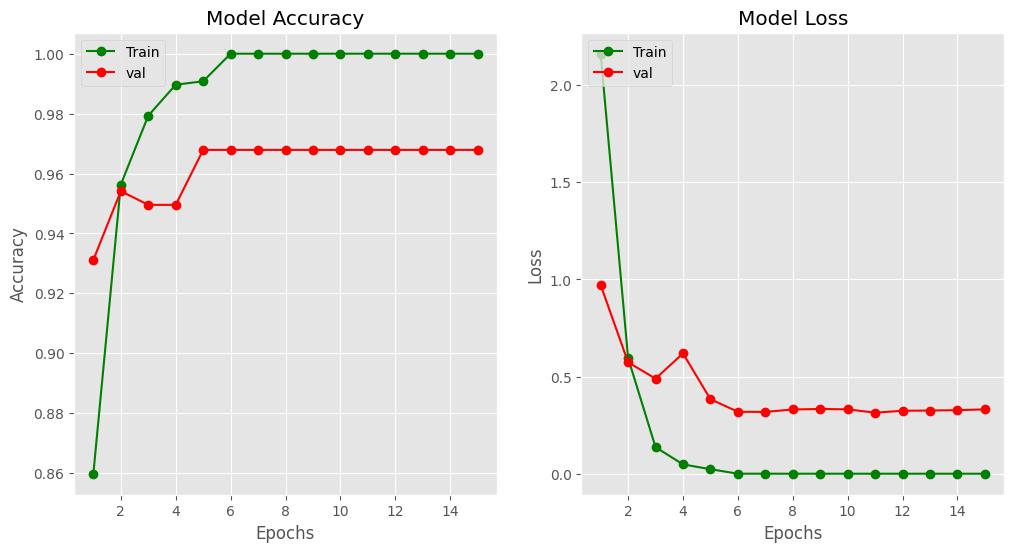

In [35]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

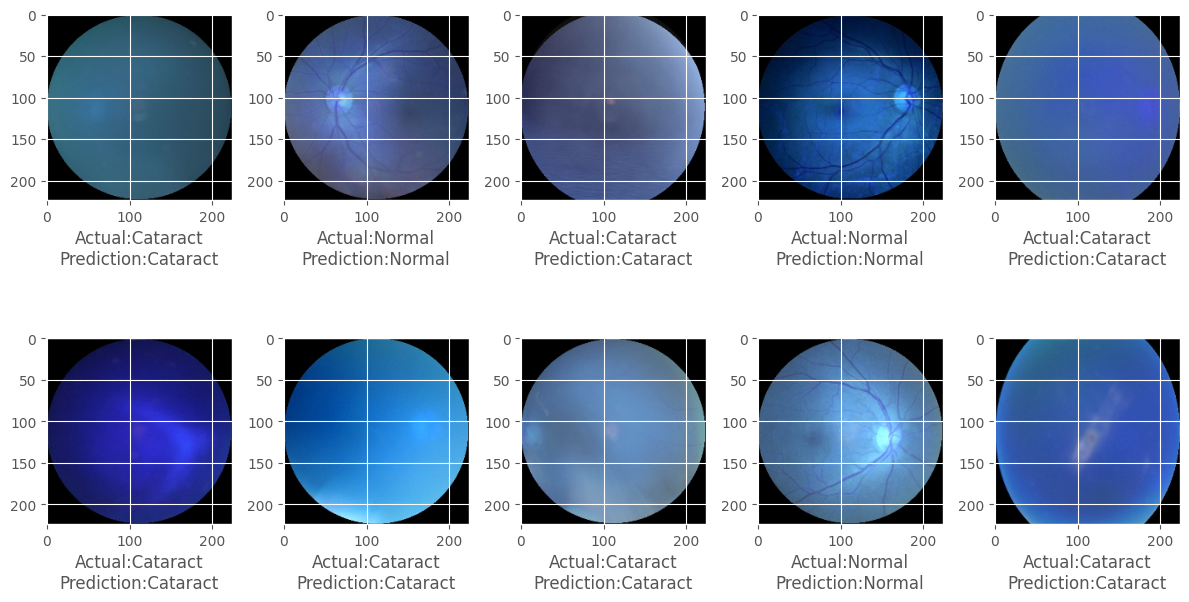

In [37]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]
    
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
        
    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"
        
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 